In [ ]:
#Import library
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#Mengatur input gambar
IMAGE_SIZE = [224, 224]

In [ ]:
#Mount google drive
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install patool

In [ ]:
# # !pip install patool
# import patoolib
# # import patoolib
# import os

# # Tentukan path ke file RAR yang ingin diekstrak
# file_path = "/content/drive/MyDrive/dataset.zip"

# # Tentukan direktori tempat Anda ingin menyimpan file yang diekstrak
# output_dir = "/content/drive/MyDrive/dataset"

# # Pastikan direktori output ada atau buat jika belum ada
# os.makedirs(output_dir, exist_ok=True)

# # Ekstrak file RAR
# patoolib.extract_archive(file_path, outdir=output_dir)

# print("File RAR telah diekstrak.")


In [ ]:
#Buat direktori
base_dir = '/content/drive/MyDrive/dataset/dataset/dataset'
!ls '/content/drive/MyDrive/dataset/dataset/dataset'

data  test  train  validasi


In [ ]:
#menentukan direktorinya
data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
CVPD_dir = os.path.join(data_dir, 'CVPD/')
KANKER_dir = os.path.join(data_dir, 'KANKER/')
ULATPELIANG_dir = os.path.join(data_dir, 'ULATPELIANG/')
SEHAT_dir = os.path.join(data_dir, 'SEHAT/')


print("Jumlah Data Latih di Tiap Kelas")
print("Jumlah Gambar Penyakit CVPD                = ", len(os.listdir(CVPD_dir)))
print("Jumlah Gambar penyakit kanker jeruk        = ", len(os.listdir(KANKER_dir)))
print("Jumlah Gambar Penyakit ulatpeliang         = ", len(os.listdir(ULATPELIANG_dir)))
print("Jumlah Gambar daun jeruk siam sehat        = ", len(os.listdir(SEHAT_dir)))

Jumlah Data Latih di Tiap Kelas
Jumlah Gambar Penyakit CVPD                =  1000
Jumlah Gambar penyakit kanker jeruk        =  1000
Jumlah Gambar Penyakit ulatpeliang         =  1000
Jumlah Gambar daun jeruk siam sehat        =  1000


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Direktori isi latih
train_CVPD = os.path.join(train_dir, 'CVPD/')
train_KANKER = os.path.join(train_dir, 'KANKER/')
train_ULATPELIANG = os.path.join(train_dir, 'ULATPELIANG/')
train_SEHAT = os.path.join(train_dir, 'SEHAT/')

#Direktori isi uji
validation_CVPD = os.path.join(validation_dir, 'CVPD/')
validation_KANKER = os.path.join(validation_dir, 'KANKER/')
validation_ULATPELIANG = os.path.join(validation_dir, 'ULATPELIANG/')
validation_SEHAT = os.path.join(validation_dir, 'SEHAT/')

#Direktori isi data test
test_CVPD = os.path.join(test_dir, 'CVPD/')
test_KANKER = os.path.join(test_dir, 'KANKER/')
test_ULATPELIANG = os.path.join(test_dir, 'ULATPELIANG/')
test_SEHAT = os.path.join(test_dir, 'SEHAT/')

In [ ]:
# import os
# import random
# from shutil import copyfile

# def train_val_test_split(source, train, val, test, train_ratio, val_ratio):
#     # Option 1: Rely on directory listing (if data size is accurate)
#     try:
#         total_size = len(os.listdir(source))
#     except NotADirectoryError:
#         # Handle case where source is not a directory (optional)
#         print(f"Error: '{source}' is not a valid directory.")
#         return

#     train_size = int(train_ratio * total_size)
#     val_size = int(val_ratio * total_size)
#     test_size = total_size - train_size - val_size

#     # Option 2: Explicitly set total size (if directory listing is unreliable)
#     # Uncomment and adjust the value if needed
#     # total_size = 1000  # Assuming all source directories have 1000 data points

#     randomized = random.sample(os.listdir(source), total_size)
#     train_files = randomized[0:train_size]
#     val_files = randomized[train_size:train_size+val_size]
#     test_files = randomized[train_size+val_size:total_size]

#     # Buat direktori train, val, dan test jika belum ada
#     os.makedirs(train, exist_ok=True)
#     os.makedirs(val, exist_ok=True)
#     os.makedirs(test, exist_ok=True)

#     for i in train_files:
#         i_file = os.path.join(source, i)
#         destination = os.path.join(train, i)
#         copyfile(i_file, destination)

#     for i in val_files:
#         i_file = os.path.join(source, i)
#         destination = os.path.join(val, i)
#         copyfile(i_file, destination)

#     for i in test_files:
#         i_file = os.path.join(source, i)
#         destination = os.path.join(test, i)
#         copyfile(i_file, destination)

# # Rasio data
# train_ratio = 0.8
# val_ratio = 0.1
# test_ratio = 0.1

# # Pembagian data
# source_00 = CVPD_dir
# train_00 = train_CVPD
# val_00 = validation_CVPD
# test_00 = test_CVPD
# train_val_test_split(source_00, train_00, val_00, test_00, train_ratio, val_ratio)

# source_01 = KANKER_dir
# train_01 = train_KANKER
# val_01 = validation_KANKER
# test_01 = test_KANKER
# train_val_test_split(source_01, train_01, val_01, test_01, train_ratio, val_ratio)

# source_02 = ULATPELIANG_dir
# train_02 = train_ULATPELIANG
# val_02 = validation_ULATPELIANG
# test_02 = test_ULATPELIANG
# train_val_test_split(source_02, train_02, val_02, test_02, train_ratio, val_ratio)

# source_03 = SEHAT_dir
# train_03 = train_SEHAT
# val_03 = validation_SEHAT
# test_03 = test_SEHAT
# train_val_test_split(source_03, train_03, val_03, test_03, train_ratio, val_ratio)


In [ ]:
print('Jumlah Train Penyakit CVPD                = ', len(os.listdir(train_CVPD)))
print('Jumlah Train Penyakit kanker jeruk        = ', len(os.listdir(train_KANKER)))
print('Jumlah Train Penyakit ULAT PELIANG        = ', len(os.listdir(train_ULATPELIANG)))
print('Jumlah Train daun jeruk siam sehat        = ', len(os.listdir(train_SEHAT)))
print('=======================================================================================')
print('Jumlah validasi Penyakit CVPD             = ', len(os.listdir(validation_CVPD)))
print('Jumlah validasi Penyakit kanker jeruk     = ', len(os.listdir(validation_KANKER)))
print('Jumlah validasi Penyakit ULAT PELIANG     = ', len(os.listdir(validation_ULATPELIANG)))
print('Jumlah validasi daun jeruk siam sehat     = ', len(os.listdir(validation_SEHAT)))
print('=======================================================================================')
print('Jumlah test Penyakit CVPD                 = ', len(os.listdir(test_CVPD)))
print('Jumlah test Penyakit kanker jeruk         = ', len(os.listdir(test_KANKER)))
print('Jumlah test Penyakit ULAT PELIANG         = ', len(os.listdir(test_ULATPELIANG)))
print('Jumlah test daun jeruk siam sehat         = ', len(os.listdir(test_SEHAT)))

Jumlah Train Penyakit CVPD                =  800
Jumlah Train Penyakit kanker jeruk        =  800
Jumlah Train Penyakit ULAT PELIANG        =  800
Jumlah Train daun jeruk siam sehat        =  800
Jumlah validasi Penyakit CVPD             =  100
Jumlah validasi Penyakit kanker jeruk     =  100
Jumlah validasi Penyakit ULAT PELIANG     =  100
Jumlah validasi daun jeruk siam sehat     =  100
Jumlah test Penyakit CVPD                 =  100
Jumlah test Penyakit kanker jeruk         =  100
Jumlah test Penyakit ULAT PELIANG         =  100
Jumlah test daun jeruk siam sehat         =  100


In [ ]:
# Download pre-trained model VGG16
vgg = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='max',
    classes=1000,
    classifier_activation="softmax",
)
vgg.summary()


553467096/553467096 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
#Buat parameter sebelumnya tidak dilatih lagi
for layer in vgg.layers:
  layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout

# Mengambil output dari layer sebelum layer prediksi 1000
x = vgg.layers[-2].output

x = Dropout(0.8)(x) # Tambahkan layer dropout dengan rate=0.8
# Membuat layer prediksi baru dengan 4 unit dan nama 'prediksi'
predictions = Dense(4, activation='softmax', name='prediksi')(x)

# Membuat model baru
model = Model(inputs=vgg.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
from keras import optimizers
import tensorflow as tf

# Definisikan metrik F1
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Inisialisasi optimizer menggunakan SGD
sgd = optimizers.SGD()

# Kompilasi model menggunakan SGD sebagai optimizer
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  F1Score(name='f1_score')
              ])


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3200 images belonging to 4 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 400 images belonging to 4 classes.


In [ ]:
#epoch 100
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h4',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set),
  callbacks=callbacks,
  verbose=2)


duration = datetime.now() - start
print("Waktu Latih : ", duration)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.48697, saving model to mymodel.h4
100/100 - 87s - loss: 0.8773 - accuracy: 0.3300 - precision: 0.3366 - recall: 0.2975 - f1_score: 0.3159 - val_loss: 0.4870 - val_accuracy: 0.5050 - val_precision: 0.5428 - val_recall: 0.4125 - val_f1_score: 0.4687 - 87s/epoch - 872ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.48697 to 0.44082, saving model to mymodel.h4
100/100 - 72s - loss: 0.6878 - accuracy: 0.4066 - precision: 0.4224 - recall: 0.3650 - f1_score: 0.3916 - val_loss: 0.4408 - val_accuracy: 0.5825 - val_precision: 0.6620 - val_recall: 0.4750 - val_f1_score: 0.5531 - 72s/epoch - 719ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.44082
100/100 - 67s - loss: 0.6238 - accuracy: 0.4406 - precision: 0.4579 - recall: 0.3947 - f1_score: 0.4240 - val_loss: 0.4430 - val_accuracy: 0.5550 - val_precision: 0.6183 - val_recall: 0.4900 - val_f1_score: 0.5467 - 67s/epoch - 669ms/step
Epoch 4/100

Epoch 4: val_loss did not impr

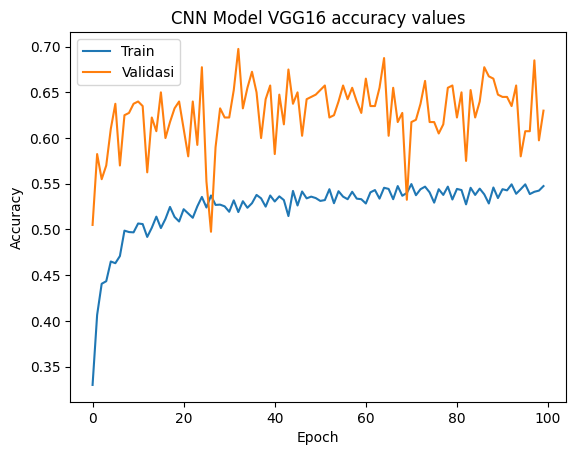

In [ ]:
# Plot Akurasi
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model VGG16 accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()


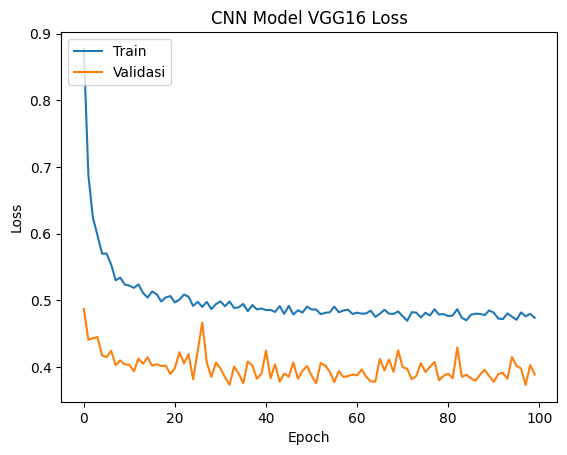

In [ ]:
_# Plot Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model VGG16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()

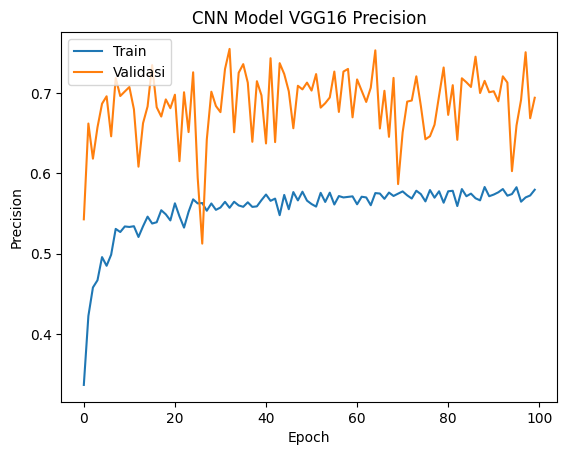

In [ ]:
_# Plot Loss
plt.plot(model_history.history['precision'])
plt.plot(model_history.history['val_precision'])
plt.title('CNN Model VGG16 Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()

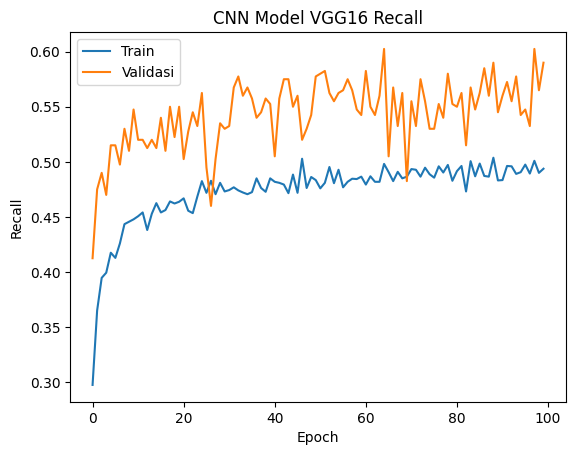

In [ ]:
_# Plot Loss
plt.plot(model_history.history['recall'])
plt.plot(model_history.history['val_recall'])
plt.title('CNN Model VGG16 Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()

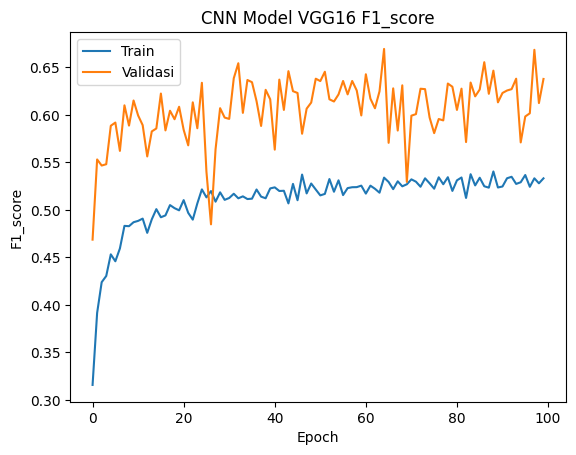

In [ ]:
_# Plot Loss
plt.plot(model_history.history['f1_score'])
plt.plot(model_history.history['val_f1_score'])
plt.title('CNN Model VGG16 F1_score')
plt.ylabel('F1_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()

Saving cvpd (1).JPG to cvpd (1).JPG
Saving cvpd (9).JPG to cvpd (9).JPG
Saving cvpd (14).JPG to cvpd (14).JPG
Saving cvpd (38).JPG to cvpd (38).JPG
Saving cvpd (42).JPG to cvpd (42).JPG
Saving cvpd (56).JPG to cvpd (56).JPG
Saving cvpd (57).JPG to cvpd (57).JPG
Saving cvpd (76).JPG to cvpd (76).JPG
Saving cvpd (78).JPG to cvpd (78).JPG
Saving cvpd (80).JPG to cvpd (80).JPG
Saving cvpd (85).JPG to cvpd (85).JPG
Saving cvpd (96).JPG to cvpd (96).JPG
Saving cvpd (100).JPG to cvpd (100).JPG
Saving cvpd (114).JPG to cvpd (114).JPG
Saving cvpd (129).JPG to cvpd (129).JPG
Saving cvpd (130).JPG to cvpd (130).JPG
Saving cvpd (132).JPG to cvpd (132).JPG
Saving cvpd (151).JPG to cvpd (151).JPG
Saving cvpd (161).JPG to cvpd (161).JPG
Saving cvpd (169).JPG to cvpd (169).JPG
Saving cvpd (206).JPG to cvpd (206).JPG
Saving cvpd (215).JPG to cvpd (215).JPG
Saving cvpd (222).JPG to cvpd (222).JPG
Saving cvpd (237).JPG to cvpd (237).JPG
Saving cvpd (282).JPG to cvpd (282).JPG
Saving cvpd (287).JPG to cvp

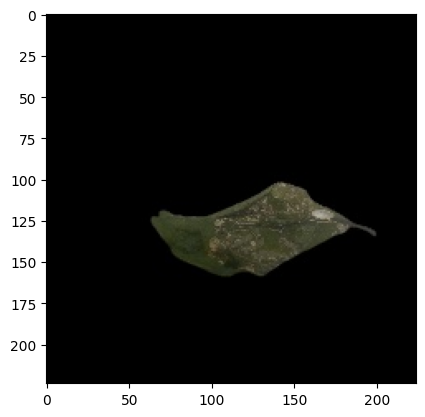

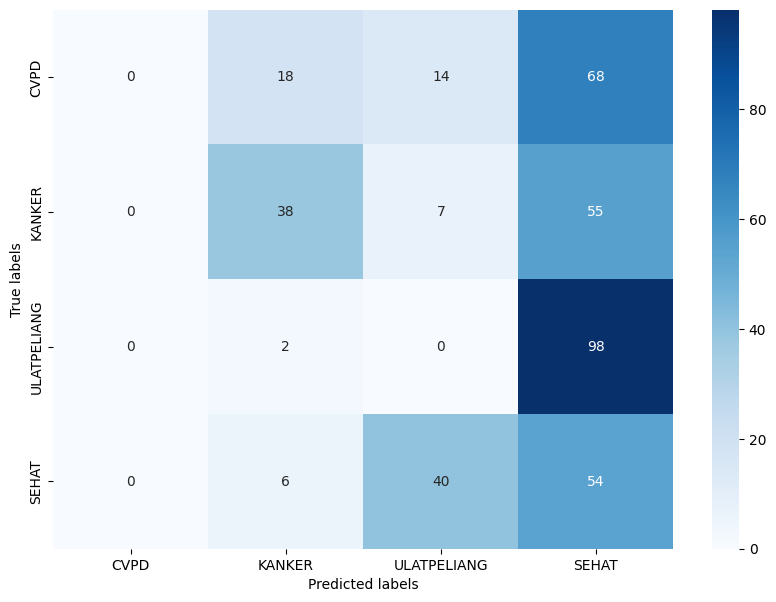

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the model has been trained and is ready to use
assert model is not None, "Model belum diinisialisasi."

uploaded = files.upload()

class_list = ['CVPD', 'KANKER', 'ULATPELIANG', 'SEHAT']  # Daftar kelas

y_pred = []
y_true = []

for fn in uploaded.keys():
    # Prediction
    path = fn
    img = image.load_img(path, target_size=(224, 224))  # Size must match the model input
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)

    predicted_class = np.argmax(classes[0])  # Get the index with the highest probability

    print('This image is predicted as ', class_list[predicted_class])
    print('')
    print('')
    print('=======================================================================================================')
    print('')
    print('')
    y_pred.append(predicted_class)

    # Extract the true label from the file name
    true_label = fn.split(' ')[0].lower()  # Use the last part of the split as the class name
    true_label = true_label.upper()
    print("ini true label", true_label);
    y_true.append(class_list.index(true_label))  # add the true label to y_true

# Now that we have all the predictions and true labels, we can calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', xticklabels=class_list, yticklabels=class_list)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Buat laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=class_list)

print('Classification Report')
print(report)

Saving cvpd (1).JPG to cvpd (1) (1).JPG
1/1 [==============================] - 0s 28ms/step
cvpd (1) (1).JPG
Gambar ini diprediksi sebagai  SEHAT


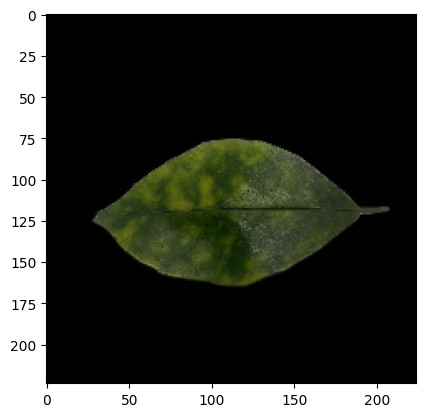

In [ ]:
from google.colab import files

# Memastikan model sudah dilatih dan siap digunakan
assert model is not None, "Model belum diinisialisasi."

uploaded = files.upload()

for fn in uploaded.keys():
  # Prediksi
  path = fn
  img = image.load_img(path, target_size=(224, 224)) # Ukuran harus sesuai dengan input model
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)

  # class_list = ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka'] # Daftar kelas
  class_list = ['CVPD', 'KANKER', 'ULATPELIANG', 'SEHAT']  # Daftar kelas


  predicted_class = np.argmax(classes[0]) # Mengambil indeks dengan nilai probabilitas tertinggi

  print('Gambar ini diprediksi sebagai ', class_list[predicted_class])


In [ ]:
import torch

# Make sure you define and initialize your model (e.g., using nn.Module) before this line
model = '/content/mymodel.h4'# Replace ... with your model definition and initialization

model_save_name = 'mymodel.h4'
path = model_save_name
torch.save(model, path)


RuntimeError: File mymodel.h4 cannot be opened.

In [ ]:
import shutil

# Path model yang sudah ada di Google Colab
colab_model_path = "/content/mymodel.h4"

# Path tujuan di Google Drive
drive_model_path = "/content/drive/MyDrive/mymodel.h4"

# Memindahkan model dari Colab ke Google Drive
shutil.move(colab_model_path, drive_model_path)


'/content/drive/MyDrive/mymodel.h4'